# Project-level Analysis

In [6]:
x=list()
classes=c("character","integer","integer","integer","integer","integer","integer","integer","integer",
          "integer","integer","numeric","numeric","integer","character","integer","integer","integer",
          "integer","numeric","numeric","numeric","numeric")
for(i in 0:2){
    path=paste("../data/projects/sample.P2all.",i,"y",sep="")
    x[[i+1]]=read.table(path,sep=";",colClasses=classes,na.strings=c("null"))
}
names(x)=c("All","1y","2y")

In [7]:
for(i in 1:3) {
    names(x[[i]])=c("p","ncmt","nblob","na","ncore","nmc","nf","cs","nfr","gm","gf","et","lt","ns",
                    "l","nb","cc","bc","bcc","ad","as","acs","ebt")
    x[[i]]$c=x[[i]]$cc>0
    x[[i]]$cr=x[[i]]$cc/x[[i]]$nb
    x[[i]]$br=x[[i]]$bc/x[[i]]$nb
    x[[i]]$bcr=x[[i]]$bcc/x[[i]]$cc
    x[[i]][is.na(x[[i]]$na),"na"]=1
    x[[i]][is.na(x[[i]]$ncore),"ncore"]=1
    x[[i]][is.na(x[[i]]$cs),"cs"]=1
    x[[i]][is.na(x[[i]]$ns),"ns"]=0
    x[[i]][is.na(x[[i]]$gm),"gm"]=0
    x[[i]][is.na(x[[i]]$gf),"gf"]=0
}

In [8]:
tmp=list()
for(i in 1:3) {
    tmp[[i]]=names(table(x[[i]]$l)[table(x[[i]]$l)>1000])
}
tmp2=intersect(intersect(tmp[[1]],tmp[[2]]),tmp[[3]])
for(i in 1:3) {
    x[[i]]$ll=as.factor(ifelse(((x[[i]]$l %in% tmp2) & (x[[i]]$l != "null") & (x[[i]]$l != "Unknown")),
                     as.character(x[[i]]$l), "0ther"))
}
ty=names(table(x[[i]]$ll))

## Variables

**From MongoDB:**  

- p: Project  
- ncmt: NumCommits  
- nblob: NumBlobs  
- na: NumAuthors  
- ncore: NumCore  
- nmc: NumActiveMon  
- nf: NumFiles  
- cs: CommunitySize  
- nfr: NumForks  
- gm: Gender.male  
- gf: Gender.female  
- et: EarliestCommitDate  
- lt: LatestCommitDate  
- ns: Number of stars  

**Calculated in copy timeframe(1y/2y):**

- l: Most common original blob language  
- nb: Original blobs count  
- cc: Copied blobs count  
- bc: Original binary blobs count  
- bcc: Copied binary blobs count  
- ad: Average downstream projects count  
- as: Average original blob size (excluding binary blobs)  
- acs: Average copied blob size (excluding binary blobs)  
- ebt: Earliest original blob time  
- c: Whether project has copied blobs
- cr: Copied to original blobs ratio (cc/nb)
- br: Binary to original blobs ratio (bc/nb)
- bcr: Binary to copied blobs ratio (bcc/cc)

In [17]:
n=dim(x[[1]])[1]
data=x[[1]]
data=data[data$ns>0,]
data=data[data$ncmt>10,]
n1=dim(data)[1]
print(n1)
print(n)
print(n1/n)

[1] 54852
[1] 921103
[1] 0.05955034


In [476]:
for(i in 1:3) {
    print(names(x)[i])
    print(summary(x[[i]]))
}

[1] "All"
      p                  ncmt             nblob               na          
 Length:921103      Min.   :      1   Min.   :      1   Min.   :    1.00  
 Class :character   1st Qu.:      2   1st Qu.:      6   1st Qu.:    1.00  
 Mode  :character   Median :      4   Median :     24   Median :    1.00  
                    Mean   :     46   Mean   :    396   Mean   :    2.14  
                    3rd Qu.:     12   3rd Qu.:     85   3rd Qu.:    1.00  
                    Max.   :6129261   Max.   :5332329   Max.   :40930.00  
                                                                          
     ncore                nmc                nf                cs          
 Min.   :    1.000   Min.   :  0.000   Min.   :      1   Min.   :    1.00  
 1st Qu.:    1.000   1st Qu.:  1.000   1st Qu.:      4   1st Qu.:    1.00  
 Median :    1.000   Median :  1.000   Median :     17   Median :    1.00  
 Mean   :    1.493   Mean   :  2.209   Mean   :    430   Mean   :    2.04  
 3rd Qu.: 

### 1. What fraction of projects have copied blobs?

In [128]:
for(i in 1:3) {
    print(c(names(x)[i],sum(x[[i]]$c)/dim(x[[i]])[1]))
}

[1] "All"               "0.318064320711147"
[1] "1y"               "0.29248618905248"
[1] "2y"                "0.331250120216197"


### 2. Does propensity to copy vary by language?

In [129]:
for(i in 2:3){
    print(names(x)[i])
    test=aov(c ~ ll, data=x[[i]])
    print(summary(test));
}

[1] "1y"
                Df Sum Sq Mean Sq F value Pr(>F)    
ll              20   8613   430.7    2192 <2e-16 ***
Residuals   823782 161863     0.2                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
[1] "2y"
                Df Sum Sq Mean Sq F value Pr(>F)    
ll              20   7224   361.2    1720 <2e-16 ***
Residuals   623855 130979     0.2                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


#### 2.1. Which languages are different?

In [447]:
sv=0.005
for(i in 3:3){
    print(names(x)[i])
    for(l in ty){ 
        test=t.test(x[[i]][x[[i]]$ll==l,"c"],x[[i]][x[[i]]$ll!=l,"c"])
        mean=sum(x[[i]][x[[i]]$ll==l,"c"])/dim(x[[i]][x[[i]]$ll==l,])[1]
        print(c(l,mean,sprintf("t: %f %f",test$statistic, test$p.value)))        
    }
}

[1] "2y"
[1] "0ther"                 "0.354514374252657"     "t: 30.431312 0.000000"
[1] "C"                    "0.332554692062351"    "t: 0.420724 0.673960"
[1] "CSS"                   "0.328758577666875"     "t: -0.477873 0.632753"
[1] "Cs"                    "0.370690232309031"     "t: 10.107634 0.000000"
[1] "Fml"                   "0.320512820512821"     "t: -0.787390 0.431213"
[1] "Go"                    "0.313956340446407"     "t: -2.386601 0.017050"
[1] "JS"                    "0.412692696413843"     "t: 52.657866 0.000000"
[1] "Kotlin"               "0.400225479143179"    "t: 5.937019 0.000000"
[1] "Markdown"                "0.116931821511236"      
[3] "t: -212.408878 0.000000"
[1] "ObjectiveC"           "0.400234741784038"    "t: 9.222776 0.000000"
[1] "PY"                    "0.322683239962652"     "t: -3.488192 0.000487"
[1] "R"                     "0.28483396097227"      "t: -5.569183 0.000000"
[1] "Rust"                  "0.315217391304348"     "t: -1.147067 0.251602"
[1

In [448]:
for(i in 3:3) {
    print(names(x)[i])
    glm=glm(c~ll, data=x[[i]], family=binomial)
    print(summary(glm))
}

[1] "2y"

Call:
glm(formula = c ~ ll, family = binomial, data = x[[i]])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3980  -0.9357  -0.8827   1.3304   2.0718  

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept)  -0.599254   0.004289 -139.704  < 2e-16 ***
llC          -0.097399   0.014859   -6.555 5.56e-11 ***
llCSS        -0.114551   0.024162   -4.741 2.13e-06 ***
llCs          0.069997   0.017475    4.005 6.19e-05 ***
llFml        -0.152162   0.062793   -2.423  0.01538 *  
llGo         -0.182433   0.034017   -5.363 8.19e-08 ***
llJS          0.246409   0.008144   30.256  < 2e-16 ***
llKotlin      0.194728   0.048649    4.003 6.26e-05 ***
llMarkdown   -1.422557   0.010629 -133.836  < 2e-16 ***
llObjectiveC  0.194767   0.031564    6.171 6.81e-10 ***
llPY         -0.142214   0.012325  -11.539  < 2e-16 ***
llR          -0.321354   0.041219   -7.796 6.38e-15 ***
llRust       -0.176585   0.064921   -2.720  0.00653 ** 
llScala       0

### 3. Does copied blobs ratio differ by language?

In [451]:
for(i in 1:3){
    mean=sum(x[[i]]$cr)/dim(x[[i]])[1]
    print(c(names(x)[i],mean))
}

[1] "All"                "0.0608813527850081"
[1] "1y"                 "0.0525710314357137"
[1] "2y"                "0.059803944369165"


In [131]:
for(i in 2:3){
    print(names(x)[i])
    test=aov(cr ~ ll, data=x[[i]])
    print(summary(test));
}

[1] "1y"
                Df Sum Sq Mean Sq F value Pr(>F)    
ll              20    118   5.878   230.9 <2e-16 ***
Residuals   823782  20976   0.025                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
[1] "2y"
                Df Sum Sq Mean Sq F value Pr(>F)    
ll              20     67   3.337   118.2 <2e-16 ***
Residuals   623855  17617   0.028                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


#### 3.1. Which languages are different?

In [452]:
sv=0.005
for(i in 3:3){
    print(names(x)[i])
    for(l in ty){ 
        test=t.test(x[[i]][x[[i]]$ll==l,"cr"],x[[i]][x[[i]]$ll!=l,"cr"])
        mean=sum(x[[i]][x[[i]]$ll==l,"cr"])/dim(x[[i]][x[[i]]$ll==l,])[1]
        print(c(l,mean,sprintf("t: %f %f",test$statistic, test$p.value)))
    }
}

[1] "2y"
[1] "0ther"                 "0.0668074657317744"    "t: 25.324852 0.000000"
[1] "C"                     "0.0574663555703928"    "t: -2.162675 0.030576"
[1] "CSS"                   "0.097748145248851"     "t: 15.326840 0.000000"
[1] "Cs"                     "0.0432788160719275"     "t: -14.945456 0.000000"
[1] "Fml"                   "0.0325978521672272"    "t: -8.673058 0.000000"
[1] "Go"                     "0.0407526539301348"     "t: -10.082458 0.000000"
[1] "JS"                   "0.0620186215381198"   "t: 4.376852 0.000012"
[1] "Kotlin"                "0.0336586514689889"    "t: -9.675417 0.000000"
[1] "Markdown"               "0.0473323457508163"     "t: -24.707228 0.000000"
[1] "ObjectiveC"            "0.0565318053931747"    "t: -1.446284 0.148170"
[1] "PY"                     "0.0474306365439212"     "t: -16.315072 0.000000"
[1] "R"                     "0.0585286982359239"    "t: -0.416818 0.676842"
[1] "Rust"                  "0.0305404604237794"    "t: -9.273970 0.00

In [436]:
for(i in 2:3) {
    print(names(x)[i])
    lm=lm(cr~ll, data=x[[i]])
    print(summary(lm))
}

[1] "1y"

Call:
lm(formula = cr ~ ll, data = x[[i]])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.09212 -0.06023 -0.04449 -0.03555  0.97688 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0602310  0.0002887 208.653  < 2e-16 ***
llC          -0.0126833  0.0010137 -12.512  < 2e-16 ***
llCSS         0.0318918  0.0014159  22.523  < 2e-16 ***
llCs         -0.0219777  0.0011857 -18.535  < 2e-16 ***
llFml        -0.0322901  0.0043768  -7.378 1.61e-13 ***
llGo         -0.0283086  0.0021980 -12.879  < 2e-16 ***
llJS         -0.0010494  0.0005392  -1.946 0.051645 .  
llKotlin     -0.0276177  0.0029787  -9.272  < 2e-16 ***
llMarkdown   -0.0246830  0.0005205 -47.420  < 2e-16 ***
llObjectiveC -0.0130377  0.0023493  -5.550 2.87e-08 ***
llPY         -0.0206444  0.0007829 -26.369  < 2e-16 ***
llR          -0.0121334  0.0026395  -4.597 4.29e-06 ***
llRust       -0.0345624  0.0040350  -8.566  < 2e-16 ***
llScala      -0.0371121  0.0046680  -7.950 1

### 4. Are binary blobs being copied more?

In [89]:
for(i in 2:3) {
    print(names(x)[i])
    print(t.test(x[[i]]$bcr,x[[i]]$br))
}

[1] "1y"

	Welch Two Sample t-test

data:  x[[i]]$bcr and x[[i]]$br
t = 99.91, df = 308790, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.07799839 0.08111986
sample estimates:
mean of x mean of y 
0.2142382 0.1346790 

[1] "2y"

	Welch Two Sample t-test

data:  x[[i]]$bcr and x[[i]]$br
t = 84.408, df = 277783, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.07109495 0.07447513
sample estimates:
mean of x mean of y 
0.2134628 0.1406778 



#### 4.1. Is this the case for all languages?

In [21]:
test$estimate[1]

mean of x 
0.07589604

In [4]:
sv=0.005
for(i in 3:3){
    print(names(x)[i])
    for(l in ty){
        data=x[[i]][x[[i]]$ll==l,]
        n=dim(data)[1]
        test=t.test(data$br,data$bcr)
        print(c(l,sprintf("br: %f bcr: %f p: %f",
                          test$estimate[1],
                          test$estimate[2],
                          test$p.value)))
    }
}

[1] "2y"
[1] "0ther"                                 
[2] "br: 0.224816 bcr: 0.276575 p: 0.000000"
[1] "C"                                     
[2] "br: 0.110686 bcr: 0.155031 p: 0.000000"
[1] "CSS"                                   
[2] "br: 0.234134 bcr: 0.544244 p: 0.000000"
[1] "Cs"                                    
[2] "br: 0.109747 bcr: 0.211713 p: 0.000000"
[1] "Fml"                                   
[2] "br: 0.045198 bcr: 0.074478 p: 0.017064"
[1] "Go"                                    
[2] "br: 0.037749 bcr: 0.061179 p: 0.000152"
[1] "JS"                                    
[2] "br: 0.054302 bcr: 0.142895 p: 0.000000"
[1] "Kotlin"                                
[2] "br: 0.058776 bcr: 0.124781 p: 0.000000"
[1] "Markdown"                              
[2] "br: 0.075642 bcr: 0.206201 p: 0.000000"
[1] "ObjectiveC"                            
[2] "br: 0.150880 bcr: 0.228701 p: 0.000000"
[1] "PY"                                    
[2] "br: 0.137531 bcr: 0.146907 p: 0.003515"
[

In [ ]:
sum(x[[3]]$)

### 4. Does binary blob copy ratio differ by language?

In [418]:
for(i in 2:3){
    print(names(x)[i])
    test=aov(bcr ~ ll, data=x[[i]])
    print(summary(test));
}

[1] "1y"
                Df Sum Sq Mean Sq F value Pr(>F)    
ll              20   1587   79.33   619.6 <2e-16 ***
Residuals   240930  30847    0.13                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
582852 observations deleted due to missingness
[1] "2y"
                Df Sum Sq Mean Sq F value Pr(>F)    
ll              20   1195   59.75   473.6 <2e-16 ***
Residuals   206638  26073    0.13                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
417217 observations deleted due to missingness


#### 4.1. Which languages are different?

In [422]:
sv=0.005
for(i in 2:3){
    print(names(x)[i])
    for(l in ty){
        t1=x[[i]][x[[i]]$ll==l,"bcr"]
        test=t.test(t1,x[[i]][x[[i]]$ll!=l,"bcr"])
        if(test$p.value<sv){
            mean=sum(t1,na.rm=TRUE)/(dim(x[[i]][x[[i]]$ll==l,])[1]-sum(is.na(t1)))
            print(c(l,mean,sprintf("t: %f",test$statistic)))
        }else{
            print(c(l,"Not significant!"))
        }
        
    }
}

[1] "1y"
[1] "C"                "0.15647883200667" "t: -16.313175"   
[1] "CSS"              "0.53439930042172" "t: 44.427040"    
[1] "Cs"               "Not significant!"
[1] "Fml"                "0.0772577394365586" "t: -11.139169"     
[1] "Go"                 "0.0622853212577221" "t: -26.675567"     
[1] "JS"                "0.136183458586808" "t: -58.277499"    
[1] "Kotlin"            "0.128782874556374" "t: -9.936099"     
[1] "Markdown"          "0.230244243600899" "t: 4.763339"      
[1] "ObjectiveC"       "Not significant!"
[1] "Other"             "0.282266697604368" "t: 72.411801"     
[1] "PY"                "0.151788983656584" "t: -22.695511"    
[1] "R"                "Not significant!"
[1] "Rust"              "0.101166936395622" "t: -8.758388"     
[1] "Scala"              "0.0841104720143495" "t: -9.856246"      
[1] "Sql"              "Not significant!"
[1] "Swift"            "Not significant!"
[1] "TypeScript"         "0.0624840032112579" "t: -61.309956"     
[1] "ip

In [437]:
for(i in 2:3) {
    print(names(x)[i])
    lm=lm(bcr~ll, data=x[[i]])
    print(summary(lm))
}

[1] "1y"

Call:
lm(formula = bcr ~ ll, data = x[[i]])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53440 -0.23514 -0.13618  0.09067  0.93771 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.282267   0.001153 244.779  < 2e-16 ***
llC          -0.125788   0.004224 -29.778  < 2e-16 ***
llCSS         0.252133   0.005900  42.734  < 2e-16 ***
llCs         -0.079614   0.004642 -17.150  < 2e-16 ***
llFml        -0.205009   0.018588 -11.029  < 2e-16 ***
llGo         -0.219981   0.009458 -23.260  < 2e-16 ***
llJS         -0.146083   0.002022 -72.232  < 2e-16 ***
llKotlin     -0.153484   0.010560 -14.535  < 2e-16 ***
llMarkdown   -0.052022   0.003352 -15.518  < 2e-16 ***
llObjectiveC -0.047129   0.008986  -5.244 1.57e-07 ***
llPY         -0.130478   0.003367 -38.753  < 2e-16 ***
llR          -0.087899   0.012076  -7.279 3.38e-13 ***
llRust       -0.181100   0.017059 -10.616  < 2e-16 ***
llScala      -0.198156   0.018816 -10.531  < 2e-16 ***
ll

### 5. Does binary blob copy ratio differ by language? (Normalized with binary blob ratio)

binary copy ratio / binary blob ratio

In [393]:
for(i in 2:3){
    print(names(x)[i])
    test=aov(bcr/br ~ ll, data=x[[i]])
    print(summary(test));
}

[1] "1y"
                Df    Sum Sq Mean Sq F value   Pr(>F)    
ll              20    274697   13735   5.464 2.68e-14 ***
Residuals   144310 362720422    2513                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
679472 observations deleted due to missingness
[1] "2y"
                Df    Sum Sq Mean Sq F value Pr(>F)    
ll              20    234371   11719    7.99 <2e-16 ***
Residuals   124779 183004790    1467                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
499076 observations deleted due to missingness


#### 5.1. Which languages are different?

In [417]:
for(i in 2:3){
    tmp=x[[i]]$bcr/x[[i]]$br
    s=sum(tmp,na.rm=TRUE)/(dim(x[[i]])[1]-sum(is.na(tmp)))
    print(c(names(x)[i],s))
}

[1] "1y"               "4.30255631374552"
[1] "2y"               "4.06794982518847"


In [10]:
sv=0.005
for(i in 3:3){
    print(names(x)[i])
    for(l in ty){
        t1=x[[i]][x[[i]]$ll==l,"bcr"]/x[[i]][x[[i]]$ll==l,"br"]
        t2=x[[i]][x[[i]]$ll!=l,"bcr"]/x[[i]][x[[i]]$ll!=l,"br"]
        test=t.test(t1,t2)
        mean=sum(t1,na.rm=TRUE)/(dim(x[[i]][x[[i]]$ll==l,])[1]-sum(is.na(t1)))
        print(c(l,sprintf("mean: %f p: %f",test$estimate[1],test$p.value)))
    }
}

[1] "2y"
[1] "0ther"                      "mean: 3.545104 p: 0.000018"
[1] "C"                          "mean: 3.334187 p: 0.001347"
[1] "CSS"                        "mean: 2.541475 p: 0.000000"
[1] "Cs"                         "mean: 4.920427 p: 0.014968"
[1] "Fml"                        "mean: 3.085897 p: 0.305159"
[1] "Go"                         "mean: 5.739548 p: 0.146827"
[1] "JS"                         "mean: 7.048495 p: 0.000000"
[1] "Kotlin"                     "mean: 5.429070 p: 0.104114"
[1] "Markdown"                   "mean: 2.601752 p: 0.000000"
[1] "ObjectiveC"                 "mean: 2.170565 p: 0.000000"
[1] "PY"                         "mean: 2.215426 p: 0.000000"
[1] "R"                          "mean: 2.658706 p: 0.000007"
[1] "Rust"                       "mean: 6.060592 p: 0.130000"
[1] "Scala"                      "mean: 5.383353 p: 0.282328"
[1] "Sql"                        "mean: 1.719792 p: 0.000000"
[1] "Swift"                      "mean: 2.414920 p: 0.000000"

In [12]:
for(i in 3:3) {
    print(names(x)[i])
    metric=x[[i]]$bcr/x[[i]]$br
    ll=x[[i]]$ll
    lm=lm(metric~ll)
    print(summary(lm))
}

[1] "2y"

Call:
lm(formula = metric ~ ll)

Residuals:
   Min     1Q Median     3Q    Max 
  -7.0   -3.5   -2.7   -1.3 9904.1 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.54510    0.15898  22.299  < 2e-16 ***
llC          -0.21092    0.56978  -0.370 0.711254    
llCSS        -1.00363    0.85923  -1.168 0.242784    
llCs          1.37532    0.64616   2.128 0.033302 *  
llFml        -0.45921    3.06054  -0.150 0.880732    
llGo          2.19444    1.65720   1.324 0.185442    
llJS          3.50339    0.33955  10.318  < 2e-16 ***
llKotlin      1.88397    1.90494   0.989 0.322670    
llMarkdown   -0.94335    0.55938  -1.686 0.091717 .  
llObjectiveC -1.37454    1.04981  -1.309 0.190427    
llPY         -1.32968    0.48391  -2.748 0.006001 ** 
llR          -0.88640    1.60497  -0.552 0.580756    
llRust        2.51549    3.20647   0.785 0.432746    
llScala       1.83825    3.14141   0.585 0.558436    
llSql        -1.82531    3.11033  -0.587 0.557303

In [6]:
for(i in 3:3) {
    print(names(x)[i])
    lm=lm(bcr/br~ll, data=x[[i]])
    print(summary(lm))
}

[1] "2y"

Call:
lm(formula = bcr/br ~ ll, data = x[[i]])

Residuals:
   Min     1Q Median     3Q    Max 
  -7.0   -3.5   -2.7   -1.3 9904.1 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.54510    0.15898  22.299  < 2e-16 ***
llC          -0.21092    0.56978  -0.370 0.711254    
llCSS        -1.00363    0.85923  -1.168 0.242784    
llCs          1.37532    0.64616   2.128 0.033302 *  
llFml        -0.45921    3.06054  -0.150 0.880732    
llGo          2.19444    1.65720   1.324 0.185442    
llJS          3.50339    0.33955  10.318  < 2e-16 ***
llKotlin      1.88397    1.90494   0.989 0.322670    
llMarkdown   -0.94335    0.55938  -1.686 0.091717 .  
llObjectiveC -1.37454    1.04981  -1.309 0.190427    
llPY         -1.32968    0.48391  -2.748 0.006001 ** 
llR          -0.88640    1.60497  -0.552 0.580756    
llRust        2.51549    3.20647   0.785 0.432746    
llScala       1.83825    3.14141   0.585 0.558436    
llSql        -1.82531    3.11033  

In [5]:
for(i in 3:3) {
    print(names(x)[i])
    lm=lm(br~ll, data=x[[i]])
    print(summary(lm))
}

[1] "2y"

Call:
lm(formula = br ~ ll, data = x[[i]])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23413 -0.13753 -0.07564  0.02518  0.95712 

Coefficients:
               Estimate Std. Error  t value Pr(>|t|)    
(Intercept)   0.2248155  0.0005039  446.122  < 2e-16 ***
llC          -0.1141294  0.0017214  -66.298  < 2e-16 ***
llCSS         0.0093185  0.0027891    3.341 0.000835 ***
llCs         -0.1150688  0.0020717  -55.543  < 2e-16 ***
llFml        -0.1796180  0.0071976  -24.955  < 2e-16 ***
llGo         -0.1870667  0.0038792  -48.224  < 2e-16 ***
llJS         -0.1705136  0.0009770 -174.519  < 2e-16 ***
llKotlin     -0.1660395  0.0058526  -28.370  < 2e-16 ***
llMarkdown   -0.1491739  0.0009182 -162.472  < 2e-16 ***
llObjectiveC -0.0739359  0.0037964  -19.475  < 2e-16 ***
llPY         -0.0872848  0.0014191  -61.507  < 2e-16 ***
llR          -0.1147302  0.0045719  -25.094  < 2e-16 ***
llRust       -0.1893137  0.0074086  -25.553  < 2e-16 ***
llScala      -0.1815751  0.007

### Number of stars

In [446]:
sum(x[[3]]$ns>0)/dim(x[[3]])[1]

[1] 0.1320359

In [440]:
test=t.test(x[[3]][x[[3]]$ns>0,"c"],x[[3]][x[[3]]$ns==0,"c"])
test


	Welch Two Sample t-test

data:  x[[3]][x[[3]]$ns > 0, "c"] and x[[3]][x[[3]]$ns == 0, "c"]
t = 95.462, df = 104875, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1730579 0.1803131
sample estimates:
mean of x mean of y 
0.4846068 0.3079213 


In [441]:
test=t.test(x[[3]][x[[3]]$ns>0,"cr"],x[[3]][x[[3]]$ns==0,"cr"])
test


	Welch Two Sample t-test

data:  x[[3]][x[[3]]$ns > 0, "cr"] and x[[3]][x[[3]]$ns == 0, "cr"]
t = 13.567, df = 112927, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.006961384 0.009312506
sample estimates:
 mean of x  mean of y 
0.06686652 0.05872958 


In [468]:
name="Trivial"
data=x[[3]][x[[3]]$ns==0&x[[3]]$ncmt<10,]
pr=dim(data)[1]/dim(x[[3]])[1]
cbr=sum(data$cc)/sum(x[[3]]$cc)
cr=sum(data$cr)/dim(data)[1]
print(c(name,pr,cbr,cr))

[1] "Trivial"            "0.621666805583161"  "0.184867331727692" 
[4] "0.0635048938245737"


In [469]:
name="Common"
data=x[[3]][x[[3]]$ns==0&x[[3]]$ncmt>=10,]
pr=dim(data)[1]/dim(x[[3]])[1]
cbr=sum(data$cc)/sum(x[[3]]$cc)
cr=sum(data$cr)/dim(data)[1]
print(c(name,pr,cbr,cr))

[1] "Common"             "0.246297341138303"  "0.273766371490749" 
[4] "0.0466764346087887"


In [471]:
name="Important"
data=x[[3]][x[[3]]$ns>0,]
pr=dim(data)[1]/dim(x[[3]])[1]
cbr=sum(data$cc)/sum(x[[3]]$cc)
cr=sum(data$cr)/dim(data)[1]
print(c(name,pr,cbr,cr))

[1] "Important"          "0.132035853278536"  "0.541366296781559" 
[4] "0.0668665209423021"


In [5]:
data3=x[[3]][x[[3]]$ns==0&x[[3]]$ncmt<10,]
data1=x[[3]][x[[3]]$ns>10&x[[3]]$ncmt>100,]
pr1=dim(data1)[1]/dim(x[[3]])[1]
pr3=dim(data3)[1]/dim(x[[3]])[1]
pr2=1-pr1-pr3
print(c(pr1,pr2,pr3))

[1] 0.006124615 0.372208580 0.621666806


In [425]:
summary(lm(c~gf+gm,data=x[[2]]))


Call:
lm(formula = c ~ gf + gm, data = x[[2]])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1923 -0.2925 -0.2923  0.7073  0.7432 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.923e-01  5.013e-04 583.124  < 2e-16 ***
gf          -1.397e-04  2.650e-05  -5.273 1.34e-07 ***
gm           1.739e-04  1.371e-05  12.689  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4549 on 823800 degrees of freedom
Multiple R-squared:  0.0002391,	Adjusted R-squared:  0.0002367 
F-statistic: 98.51 on 2 and 823800 DF,  p-value: < 2.2e-16


In [ ]:
ts=list()
for(i in 2:3){
    ts[[i]]=list()
    for(j in 1:dim(tx[[i]])[1]){
        posix=as.POSIXct(tx[[i]]$t[j], origin="1970-01-01")
        period=substr(posix,1,7)
        c=tx[[i]]$c[j]
        if(is.null(ts[[i]][[period]])){
            ts[[i]][[period]]["total"]=1
            ts[[i]][[period]]["copied"]=c
        }else{
            ts[[i]][[period]]["total"]=ts[[i]][[period]]["total"]+1
            ts[[i]][[period]]["copied"]=ts[[i]][[period]]["copied"]+c
        }
    }
}

## Variables

**From MongoDB:**  

- p: Project  
- ncmt: NumCommits  
- nblob: NumBlobs  
- na: NumAuthors  
- ncore: NumCore  
- nmc: NumActiveMon  
- nf: NumFiles  
- cs: CommunitySize  
- nfr: NumForks  
- gm: Gender.male  
- gf: Gender.female  
- et: EarliestCommitDate  
- lt: LatestCommitDate  
- ns: Number of stars  

**Calculated in copy timeframe(1y/2y):**

- l: Most common original blob language  
- nb: Original blobs count  
- cc: Copied blobs count  
- bc: Original binary blobs count  
- bcc: Copied binary blobs count  
- ad: Average downstream projects count  
- as: Average original blob size (excluding binary blobs)  
- acs: Average copied blob size (excluding binary blobs)  
- ebt: Earliest original blob time  
- c: Whether project has copied blobs
- cr: Copied to original blobs ratio (cc/nb)
- br: Binary to original blobs ratio (bc/nb)
- bcr: Binary to copied blobs ratio (bcc/cc)

In [40]:
ok_vars=c("et","lt","ll","ebt","c")
log_vars=c("ncmt","nblob","na","ncore","nmc","nf","cs","nfr","gm","gf","ns",
                    "nb","cc","bc","bcc","ad","as","acs","cr","br","bcr")
lvars=paste("l",log_vars,sep="")
pred_n=c("et","lt","ebt","lncmt","lnblob","lna","lncore","lnmc","lnf","lcs","lnfr","lgm","lgf","lns",
                    "lnb","lbc","las","lbr")

In [28]:
data=x[[3]]
data$lncmt= log(data$ncmt+1)
data$lnblob= log(data$nblob+1)
data$lna= log(data$na+1)
data$lncore= log(data$ncore+1)
data$lnmc= log(data$nmc+1)
data$lnf= log(data$nf+1)
data$lcs= log(data$cs+1)
data$lnfr= log(data$nfr+1)
data$lgm= log(data$gm+1)
data$lgf= log(data$gf+1)
data$lns= log(data$ns+1)
data$lnb= log(data$nb+1)
data$lcc= log(data$cc+1)
data$lbc= log(data$bc+1)
data$lbcc= log(data$bcc+1)
data$lad= log(data$ad+1)
data$las= log(data$as+1)
data$lacs= log(data$acs+1)
data$lcr= log(data$cr+1)
data$lbr= log(data$br+1)
data$lbcr= log(data$bcr+1)

In [45]:
nas=which(is.na(data$et) | is.na(data$lnfr) | is.na(data$las))
data=data[-nas,c(ok_vars,lvars)]

In [46]:
cor(data[,pred_n],method="spearman")

,et,lt,ebt,lncmt,lnblob,lna,lncore,lnmc,lnf,lcs,lnfr,lgm,lgf,lns,lnb,lbc,las,lbr
et,1.000000000,0.881355472,0.999106831,-0.05155038,-0.05989013,-0.04894280,-0.03245677,-0.04779655,-0.04419825,-0.19561219,-0.13935295,-0.13476840,0.003750448,-0.13319649,-0.08801195,-0.04669139,0.03878142,-0.021276377
lt,0.881355472,1.000000000,0.882353865,0.14711998,0.07725436,0.10339606,0.06682342,0.23675460,0.05740751,-0.03623132,0.01284265,-0.01413606,0.038454874,0.01805756,0.06069802,0.01535040,0.13087392,0.006996145
ebt,0.999106831,0.882353865,1.000000000,-0.05079653,-0.05992424,-0.04798569,-0.03165567,-0.04554025,-0.04436805,-0.19515960,-0.13913953,-0.13445610,0.003985425,-0.13306444,-0.08875614,-0.04720653,0.03869017,-0.021784817
lncmt,-0.051550377,0.147119985,-0.050796530,1.00000000,0.58823428,0.44775770,0.27692973,0.67871887,0.44159903,0.28366119,0.26553931,0.30252088,0.086901552,0.26482424,0.67023544,0.28385469,0.35580599,0.175477820
lnblob,-0.059890127,0.077254355,-0.059924242,0.58823428,1.00000000,0.30522101,0.19169834,0.47722349,0.96049341,0.20499207,0.18782109,0.23218482,0.059197534,0.18689455,0.89852868,0.54122135,0.53036940,0.420734681
lna,-0.048942802,0.103396059,-0.047985694,0.44775770,0.30522101,1.00000000,0.79229458,0.38055069,0.24223497,0.29281511,0.31790905,0.43119459,0.156844372,0.21568708,0.33608330,0.18414715,0.16972652,0.116040192
lncore,-0.032456771,0.066823423,-0.031655668,0.27692973,0.19169834,0.79229458,1.00000000,0.23502521,0.15868164,0.21201820,0.23365459,0.34180989,0.148783751,0.14124033,0.20604329,0.12997049,0.10647440,0.086151597
lnmc,-0.047796545,0.236754595,-0.045540247,0.67871887,0.47722349,0.38055069,0.23502521,1.00000000,0.37684805,0.30102183,0.27732004,0.26882505,0.065746635,0.28330169,0.52056218,0.23808716,0.32816915,0.140830980
lnf,-0.044198252,0.057407507,-0.044368050,0.44159903,0.96049341,0.24223497,0.15868164,0.37684805,1.00000000,0.15782661,0.13956065,0.18341531,0.047481325,0.13640564,0.82836960,0.56075417,0.50741122,0.456160541
lcs,-0.195612185,-0.036231325,-0.195159604,0.28366119,0.20499207,0.29281511,0.21201820,0.30102183,0.15782661,1.00000000,0.65620450,0.21772087,0.080381215,0.39517989,0.23453195,0.11427667,0.13327218,0.067633197


Standard deviations (1, .., p=18):
 [1] 2.43105023 1.73415077 1.62692788 1.15309781 1.09940519 0.97848399
 [7] 0.87198606 0.81056399 0.62009794 0.54208556 0.53442621 0.38739620
[13] 0.33868328 0.32703833 0.30560561 0.26607409 0.12517945 0.08428937

Rotation (n x k) = (18 x 18):
               PC1          PC2         PC3         PC4          PC5
et     -0.08901680 -0.403888363  0.40393378 -0.05665067  0.023625395
lt      0.03206881 -0.356761656  0.44708396  0.03577854  0.054740591
ebt    -0.08838708 -0.403002727  0.40448237 -0.05505955  0.022337995
lncmt   0.31716713 -0.055456205  0.02166354  0.30673186 -0.052263268
lnblob  0.30952405 -0.246875482 -0.19979324  0.14948691  0.023025838
lna     0.30998159  0.139473190  0.19849508 -0.06214409 -0.365571991
lncore  0.24346665  0.135307258  0.19353900 -0.13863776 -0.497929073
lnmc    0.29654861 -0.007137247  0.08452968  0.29452163  0.054848273
lnf     0.27324788 -0.266795830 -0.22759454  0.07837468  0.028155376
lcs     0.27109066  0.237968300

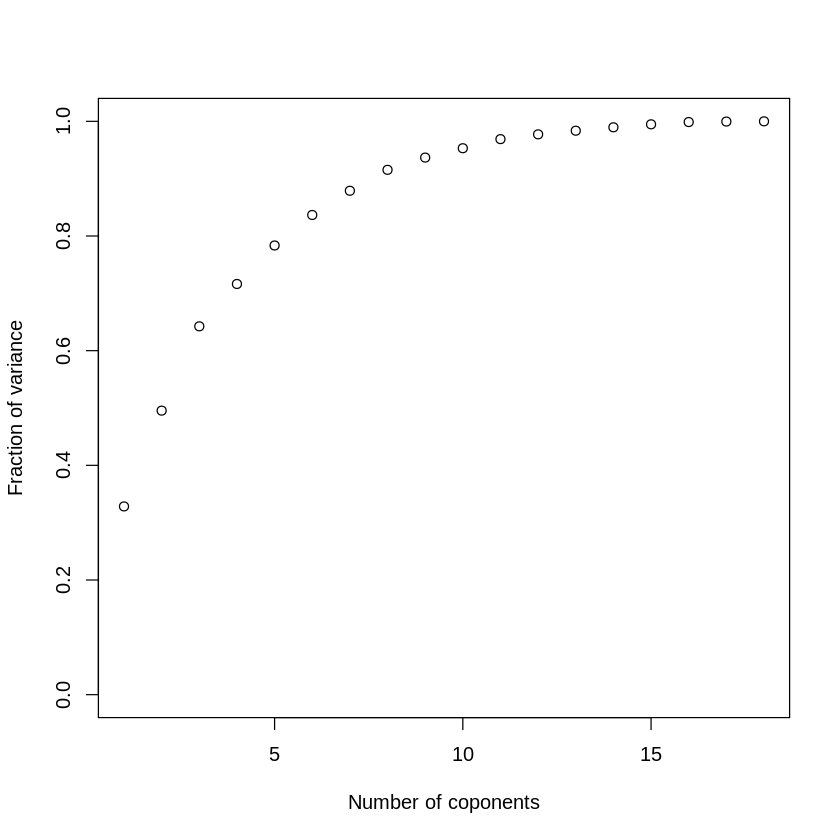

In [47]:
pca <- prcomp(data[,pred_n], retx=F, scale=T)
print(pca)
var <- sum(pca$sdev^2)
cumVar <- cumsum(pca$sdev^2)
plot(1:18,cumVar/var,ylim=c(0,1),xlab="Number of coponents",ylab="Fraction of variance")

In [48]:
n <- 0
varPer <- 0.9
for (i in c(1:length(pca$sdev))) {
    if(cumVar[i] > var*varPer) {
        n <- i
        break
    }
}
res <- pca$rotation[,1:n]
resAbs <- res
resAbs[res<0] <- -res[res<0]
for (i in 1:n)
  print(t(res[resAbs[,i]>.3,i,drop=FALSE]));

        lncmt    lnblob       lna       lnb
PC1 0.3171671 0.3095241 0.3099816 0.3281579
            et         lt        ebt
PC2 -0.4038884 -0.3567617 -0.4030027
           et       lt       ebt
PC3 0.4039338 0.447084 0.4044824
        lncmt        lbc        lbr
PC4 0.3067319 -0.4153918 -0.6195384
          lna     lncore      lnfr        lgf       lns
PC5 -0.365572 -0.4979291 0.3447874 -0.3777259 0.4626004
         lgm        lgf
PC6 0.552477 -0.7489478
        lncmt      lnmc        las
PC7 0.3767159 0.4621861 -0.6772868
       lnblob       lnmc       lnf        las
PC8 0.3459348 -0.3337459 0.4317443 -0.6268022


In [138]:
vnam <- names(data[,pred_n])
len <- dim(data[,pred_n])[2]
res <- vector(mode="list", length=len)
for (i in 1:len){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-i],collapse="+"),sep="~"));
  res[[i]] <- lm(fmla,data=data[,pred_n]);
}
for (i in 1:len) {
    print(c(vnam[i],"-> ",summary(res[[i]])$adj.r.squared),quote=FALSE)
}

[1] et                ->                0.986581424255743
[1] lt                ->                0.882742794272891
[1] ebt               ->                0.985744419027253
[1] lncmt             ->                0.779933815008178
[1] lnblob            ->                0.973398067113527
[1] lna               ->                0.840870893710708
[1] lncore            ->                0.745884673237913
[1] lnmc              ->                0.744510966293205
[1] lnf               ->                0.961666341034081
[1] lcs               ->                0.793911496033526
[1] lnfr              ->                0.820661703209608
[1] lgm               ->                0.474632109354575
[1] lgf               ->                0.235900169269144
[1] lns               ->                0.608639742856477
[1] lnb               ->                0.876843877679648
[1] lbc               ->                0.816717647409618
[1] las               ->                0.245768768216049
[1] lbr       

lnf vs lnblob -> lnblob  
lnblob vs lnb -> lnb  
lna vs lncore -> lncore  
et vs ebt -> et  
lbc vs lbr -> lbr  
et vs lt -> et  
lnmc vs lncmt -> lncmt  
lnb vs lncmt -> lncmt  
lnfr vs lns -> lns

In [152]:
pred=c("lncmt","et","lbr","lna","lns","las")
cor=cor(data[,pred],method="spearman")
cor

,lncmt,et,lbr,lna,lns,las
lncmt,1.00000000,-0.05155038,0.17547782,0.4477577,0.26482424,0.35580599
et,-0.05155038,1.00000000,-0.02127638,-0.0489428,-0.13319649,0.03878142
lbr,0.17547782,-0.02127638,1.00000000,0.1160402,0.05413461,0.26419847
lna,0.44775770,-0.04894280,0.11604019,1.0000000,0.21568708,0.16972652
lns,0.26482424,-0.13319649,0.05413461,0.2156871,1.00000000,0.14604832
las,0.35580599,0.03878142,0.26419847,0.1697265,0.14604832,1.00000000


In [157]:
glm=glm(c~lncmt+lns,data=data,family=binomial)
summary(glm)


Call:
glm(formula = c ~ lncmt + lns, family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9142  -0.8537  -0.6967   1.1407   1.8523  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.901902   0.006126 -310.44   <2e-16 ***
lncmt        0.555002   0.002565  216.33   <2e-16 ***
lns          0.223129   0.005452   40.93   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 777660  on 608334  degrees of freedom
Residual deviance: 710921  on 608332  degrees of freedom
AIC: 710927

Number of Fisher Scoring iterations: 4


In [156]:
lm=lm(lcc~lncmt+lns,data=data)
summary(lm)


Call:
lm(formula = lcc ~ lncmt + lns, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4791 -0.4659 -0.2305  0.1900 10.0312 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.074762   0.002382  -31.39   <2e-16 ***
lncmt        0.277838   0.001049  264.96   <2e-16 ***
lns          0.232061   0.002143  108.27   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.945 on 608332 degrees of freedom
Multiple R-squared:  0.159,	Adjusted R-squared:  0.159 
F-statistic: 5.749e+04 on 2 and 608332 DF,  p-value: < 2.2e-16
